## About Dataset
## Context
Emotion detection from text is one of the challenging problems in Natural Language Processing. The reason is the unavailability of labeled dataset and the multi-class nature of the problem. Humans have a variety of emotions and it is difficult to collect enough records for each emotion and hence the problem of class imbalance arises. Here we have a labeled data for emotion detection and the objective is to build an efficient model to detect emotion.

## Content
The data is basically a collection of tweets annotated with the emotions behind them. We have three columns tweet_id, sentiment, and content. In "content" we have the raw tweet. In "sentiment" we have the emotion behind the tweet. Refer to the starter notebook for more insights.

## Acknowledgements
This public domain dataset is collected from data.world platform. Thanks, data.world for releasing it under Public License.

## Inspiration
The data that we have is having 13 different emotion 40000 records. So it's challenging to build an efficient multiclass classification model. We may need to logically reduce the number of classes here and use some advanced methods to build efficient model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")

## EDA and FEature Engering

In [2]:
data = pd.read_csv("tweet_emotions.csv")

In [3]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
data.tail()

,tweet_id,sentiment,content
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...
39999,1753919049,love,@mopedronin bullet train from tokyo the gf ...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [6]:
data.shape

(40000, 3)

In [7]:
# Check null values in data 
print(data.isnull().sum())
print("There is no null value in this data")

tweet_id     0
sentiment    0
content      0
dtype: int64
There is no null value in this data


In [8]:
# now we have to check with duplicetvalues 
data.duplicated().sum()

0

In [9]:
# checking unique value in sentiment
data["sentiment"].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

<AxesSubplot:>

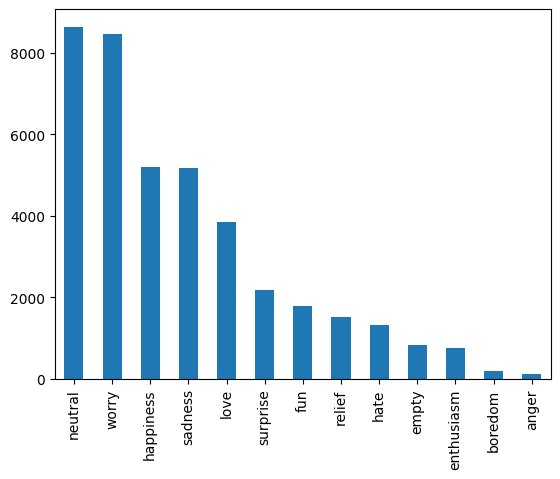

In [10]:
# ploting bar graph to see which emotion is higher valuescount in data set
data["sentiment"].value_counts().plot.bar()

In [11]:
# imporrting required liaberys
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\yash
[nltk_data]     mohite\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\yash
[nltk_data]     mohite\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\yash
[nltk_data]     mohite\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
def remove_special(text):
    # Define the pattern to match special characters
    pattern = r"[^a-zA-Z]"
    return re.sub(pattern,' ',text)
data["content"] = data["content"].apply(remove_special)

In [13]:
# removing the stop words
stop = stopwords.words("english")
data["content"] = data["content"].apply(lambda x: " ".join([i for i in x.split() if i not in stop]))

In [14]:
data["content"][0]

'tiffanylue know listenin bad habit earlier started freakin part'

In [15]:
# apply lemmatization on content to get root word
def lemmatization(text):
    lemm = WordNetLemmatizer()
    return " ".join([lemm.lemmatize(word) for word in text.split()])

In [16]:
data["content"] = data["content"].apply(lemmatization)
data["content"] = data["content"].apply(lambda x:x.lower())

In [17]:
# drop id column
data.drop("tweet_id",axis=1,inplace=True)

In [18]:
# do label encoding on sentiment feature
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
cato = ["sentiment"]
# loop throught the each categoty and encode thrm
for i in cato:
    label.fit(data[i])
    data[i] = label.transform(data[i])


In [19]:
data["sentiment"].unique()

array([ 2, 10,  3,  8, 12, 11,  7,  4,  6,  5,  1,  9,  0])

In [30]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
vector = CountVectorizer(max_features=10000)

In [31]:
# convert text in to vector
x = vector.fit_transform(data["content"]).toarray()
y = data["sentiment"]

In [32]:
x.shape

(40000, 10000)

In [33]:
y.shape

(40000,)

In [34]:
# Train test split to split data in to train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32000, 10000)
(8000, 10000)
(32000,)
(8000,)


In [36]:
from sklearn.metrics import classification_report,accuracy_score

In [37]:
bayes = MultinomialNB()

In [38]:
bayes.fit(X_train,y_train)

MultinomialNB()

In [39]:
bayes.score(X_train,y_train)

0.51384375

In [41]:
ypred = bayes.predict(X_test)
accuracy_score(y_test,ypred)

0.31875

In [42]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00       162
           3       0.12      0.01      0.01       163
           4       0.05      0.01      0.02       338
           5       0.31      0.37      0.34      1028
           6       0.43      0.07      0.13       268
           7       0.41      0.38      0.39       762
           8       0.33      0.40      0.36      1740
           9       0.12      0.01      0.03       352
          10       0.31      0.27      0.29      1046
          11       0.11      0.03      0.04       425
          12       0.31      0.52      0.39      1666

    accuracy                           0.32      8000
   macro avg       0.19      0.16      0.15      8000
weighted avg       0.29      0.32      0.29      8000

